## The geometrical efficiency of the detector calculated from the previous part

In [1]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.29433
R=2.54
t=0.03
h=5.1
z=1
i=0

x_positions=[]
y_positions=[]
r_initial=[]
r_final=[]
h_initial=[]
h_final=[]
geom_eff=[]


for k in numpy.arange(-2, 2.2, 0.2): 
      x_positions.append(k)

        
        
for j in numpy.arange(-2, 2.2, 0.2):
        
                r_s=math.sqrt(i**2+j**2+z**2)
                r_i=abs(i)-(R+t)
                r_initial.append(r_i)
                r_f=abs(i)+(R+t)
                r_final.append(r_f)
                h_i=abs(j)-h/2
                h_initial.append(h_i)
                h_f=abs(j)+h/2
                h_final.append(h_f)
                geometrical_efficiency=(z/r_s)*(1/(4*math.pi))*((numpy.arctan(r_f*h_f/r_s*math.sqrt(r_s**2+r_f**2+h_f**2))+numpy.arctan(r_i*h_i/r_s*math.sqrt(r_s**2+r_i**2+h_i**2)))-(numpy.arctan(r_f*h_i/r_s*math.sqrt(r_s**2+r_f**2+h_i**2))+numpy.arctan(r_i*h_f/r_s*math.sqrt(r_s**2+r_i**2+h_f**2))))
                geom_eff.append(geometrical_efficiency)

                
with open("axial_geo_twoin.csv", "w") as out_file:
     for number in geom_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
        
data=pd.read_csv("axial_geo_twoin.csv",names=['Calculation'])
data.to_csv("axial_geo_twoinupdated.csv")


                
print("These are the values of r_i:")                
for i in r_initial: 
    print(i)
print("These are the values of r_f:")
for i in r_final:
    print(i)
    
    
plt.scatter(x_positions,geom_eff, color="none", edgecolor="red", label="Experimental")
plt.xlabel("Diagonal position of the source (x=y)(%)")
plt.ylabel("The geometrical efficiency (%)")
plt.savefig("axitwo_geo.pdf", bbox_inches='tight')
plt.show()


0.19061811441852594
0.21653532959028687
0.24289580156426802
0.27134110351077995
0.3028284082882862
0.33777002964828584
0.37574760610785446
0.4148561352467914
0.4508918245529974
0.4772613251473915
0.48707547548373625
0.4772613251473916
0.4508918245529976
0.4148561352467915
0.3757476061078547
0.337770029648286
0.30282840828828633
0.2713411035107801
0.24289580156426813
0.21653532959028698
0.19061811441852608
These are the values of r_i:
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
-2.57
These are the values of r_f:
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57
2.57


<Figure size 640x480 with 1 Axes>

# Calculation of intrinsic detection efficiency of a cylindrical NaI(Tl) detector

### Calculation of survival paobablity of photon inside the layers

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.29529529625340595
0.28599897237633426
0.27818556633666536
0.27170263055085275
0.2664031643897099
0.26215345093642395
0.2588373945078678
0.2563587596553352
0.2546422400266302
0.2536339136144985
0.25330140281448854
0.2536339136144985
0.2546422400266303
0.2563587596553351
0.2588373945078676
0.262153450936424
0.2664031643897097
0.2717026305508528
0.27818556633666536
0.28599897237633426
0.295295296253406


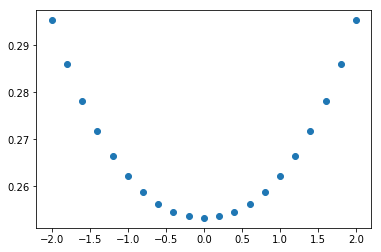

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.03
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)

plt.plot(y_positions,integral_survive, 'o')
plt.show()

### Calculation of the interaction probability of photon inside the NaI(Tl) crystal

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.03
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


358.1035682864592
329.7499779561736
304.15979817586384
281.4215663210402
261.60758249315757
244.7729689756285
230.95767571691178
220.18944779834646
212.4867143008065
207.86095168125883
206.31837688857624
207.860951681259
212.48671430080657
220.18944779834644
230.95767571691152
244.77296897562854
261.6075824931573
281.4215663210402
304.15979817586384
329.7499779561736
358.1035682864593


### Calculation of intrinsic efficiency of the detector

-----------------------------
Thease are the products
105.74629928655176
94.30815483658452
84.61286571239852
76.46297986316789
69.69308780451925
64.16807851291524
59.78048302415849
56.44749372677728
54.10809290545597
52.720586662551845
52.26073429228471
52.72058666255189
54.108092905456
56.44749372677725
59.78048302415838
64.16807851291527
69.69308780451911
76.4629798631679
84.61286571239852
94.30815483658452
105.7462992865518
THIS IS COEFFICIENT1
[0.5681, 0.59309, 0.6208, 0.6488, 0.6785, 0.7141, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
60.07447262469006
55.933223552029915
52.527667034257
49.609181335223326
47.28676007536631
45.82242486607277
45.46903538817495
46.38290559529289
48.46461881541691
50.97553524402138
52.26073429228471
50.97553524402142
48.46461881541694
46.38290559529287
45.469035388174866
45.822424866072794
47.28676007536622
49.60918133522334
52.527667034257
55.933223552029915
60.07447262469008
This is the end of the elements of products
0.0632

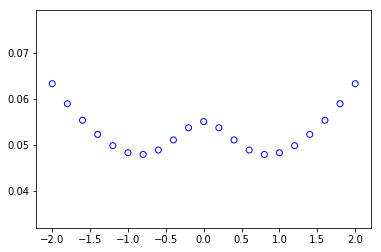

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681, 0.59309, 0.6208, 0.6488, 0.6785, 0.7141, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    

with open("axial_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)

data=pd.read_csv("axial_intr_twoin.csv",names=['Calculation'])
data.to_csv("axial_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("axitwo_intr.pdf", bbox_inches='tight')
plt.show()

### Calculation of absolute detection efficiency of the detector

0.012053981785690287
0.012748967365143152
0.01343026293535456
0.014169484218700932
0.015073446617613959
0.016292044005862896
0.017984085472779007
0.020254982059768403
0.023002421477840904
0.02560910684279916
0.026794654741625026
0.025609106842799188
0.023002421477840925
0.0202549820597684
0.017984085472778983
0.01629204400586291
0.015073446617613935
0.014169484218700944
0.013430262935354565
0.012748967365143159
0.012053981785690301


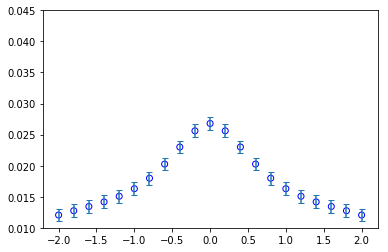

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.03
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geom_eff,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("axial_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("axial_total_twoin.csv",names=['Calculation'])
data.to_csv("axial_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.ylim(0.01,0.045)
plt.savefig("axitwo_total.pdf", bbox_inches='tight')
plt.show()